Day 3: Perform a t-test

What are we doing today? Today, we’re going to use a t-test to explore the relationship between two groups that share one numerical measure.

First, we import our libraries and read in our data.

In [41]:
import numpy as np
import pandas as pd #Pandas will help us read in our dataframe and look at our data before we run the test.
from scipy.stats import ttest_ind #Ttest_ind is a function of scipy that will produce a t-test.
import matplotlib.pyplot as plt #Pyplot will help us generate histograms of our variable groups.

cereal_data = pd.read_csv("../input/cereal.csv")

Let's use Pandas to see our column names.

In [4]:
print(list(cereal_data))

['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']


We worked with sugars yesterday, so let's work with those again.  What if sugar contents vary by brand? The second column, "mfr," contains a single character that represents the manufacturer (A = American Home Food Products; G = General Mills; K = Kelloggs; N = Nabisco; P = Post; Q = Quaker Oats; R = Ralston Purina). 

Running the Pandas method value_counts on that column...

In [26]:
print(cereal_data["mfr"].value_counts())

K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: mfr, dtype: int64


We see that Kelloggs and General Mills have the two biggest samples in the dataset. Let's compare them!

We use Pandas slicing and .loc to pull out the "sugars" column data for the rows where "mfr" is "K" or "G," respectively.

In [50]:
kelloggs = cereal_data.loc[cereal_data["mfr"] == "K", "sugars"]
gm = cereal_data.loc[cereal_data["mfr"] == "G", "sugars"]

We can now pass those two columns, which are Series, or array-like objects, into ttest_ind(). 

In [51]:
ttest_ind(kelloggs, gm, equal_var=False)

Ttest_indResult(statistic=-0.31146690416057321, pvalue=0.75696709235229653)

This returned two things: a T-statistic of -0.31, and a p-value of 0.76 (rounded). What that means is that there wasn't much difference between the two samples mathematically (the T-statistic), and that there's a pretty low probability of them actually being very different in real life.  So it looks like Kellogg's and General Mills are about the same in terms of sugar content.

Let's plot some histograms and see!

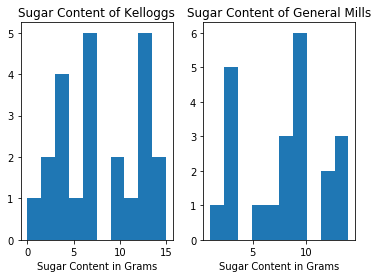

In [57]:
plt.subplot(121) #This tells Pyplot that our plot figure will have one row and two columns of plots and that this is the first plot.
plt.hist(kelloggs)
plt.title("Sugar Content of Kelloggs")
plt.xlabel("Sugar Content in Grams")

plt.subplot(122) #This tells Pyplot that this is the second plot. 
plt.hist(gm)
plt.title("Sugar Content of General Mills")
plt.xlabel("Sugar Content in Grams")

plt.show()

It looks like the t-test was right: this looks pretty random, and pretty similarly so.